# Goodread's data analysis

This exercise is a part of Capstone project.
Tasks:
1. Set BookID as the data frame index
2. Top 10 authors based on book count
3. Classify books based on language
4. Top 10 most text-reviewed books
5. Number of unique authors
6. Classify books based on number of pages
7. Classify books based on the average rating
8. Top 10 books which are extraordinary and highest rating counts
9. Top 10 authors based on average rating

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df = pd.read_csv('goodreads.csv', error_bad_lines = False) #error_bad_lines will skip the offending lines

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


Lets change the dataset to have book-ID as its index

In [4]:
df.set_index('bookID',inplace = True)

In [5]:
# Top 10 authors based on book-count
df['authors'].value_counts().head(10)

Agatha Christie                69
Stephen King                   66
Orson Scott Card               48
Rumiko Takahashi               46
P.G. Wodehouse                 42
Terry Brooks                   40
Piers Anthony                  34
Margaret Weis-Tracy Hickman    33
Dan Simmons                    32
J.R.R. Tolkien                 31
Name: authors, dtype: int64

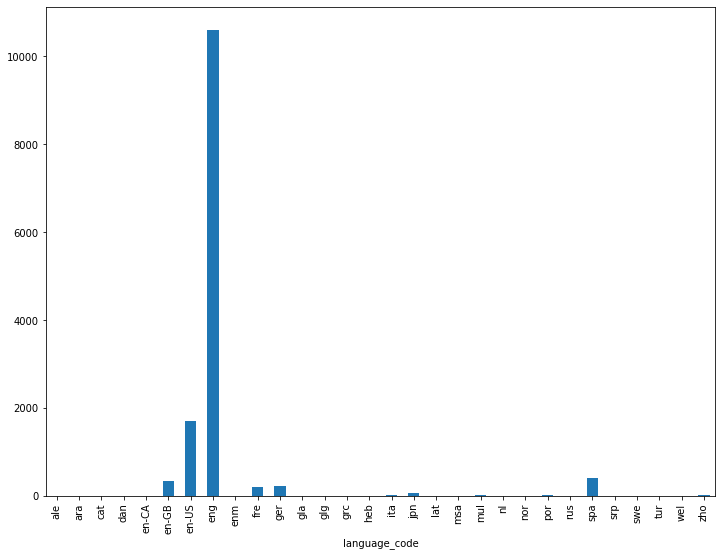

In [6]:
# Classify books based on language used
langBased = df.groupby('language_code')['title'].count()
plt.figure(figsize=(12,9))
langBased.plot.bar()

In [7]:
# Top 10 most text reviewed books
data = df.drop(['isbn','isbn13', '# num_pages', 'language_code'],axis = 1)
textReview = data.sort_values(by = 'text_reviews_count',ascending = False).head(10)
textReview

,title,authors,average_rating,ratings_count,text_reviews_count
bookID,,,,,
41865,Twilight (Twilight #1),Stephenie Meyer,3.59,4367341,93619
19063,The Book Thief,Markus Zusak,4.37,1410666,84237
3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,5629932,70390
865,The Alchemist,Paulo Coelho-Alan R. Clarke-Özdemir İnce,3.85,1592632,54668
3636,The Giver,Lois Lowry,4.12,1464909,54469
43641,Water for Elephants,Sara Gruen,4.08,1198632,52449
19501,Eat Pray Love,Elizabeth Gilbert,3.54,1309623,47291
28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.24,1645445,45829
7445,The Glass Castle,Jeannette Walls,4.26,752358,44620


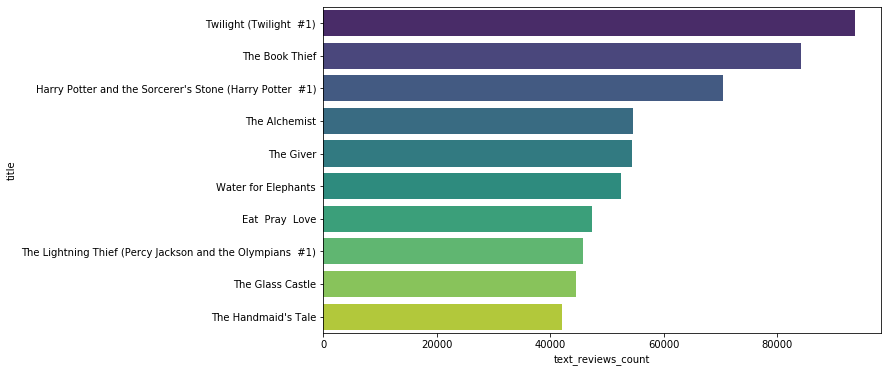

In [8]:
plt.figure(figsize=(10,6))
sn.barplot(x = textReview['text_reviews_count'], y = 'title', data = textReview, palette = 'viridis')

In [9]:
# Number of unique authors
df['authors'].apply(lambda authors: authors.split('-')[0]).nunique()

4619

In [10]:
# Book Classification based on number of pages
df.drop(['isbn','isbn13','language_code'], axis = 1, inplace= True)

In [11]:
dataCopy = df.copy()

In [12]:
myList = ['short','medium','large','will need days to finish']
Values = []
Values.append(dataCopy[(dataCopy['# num_pages'].astype(int) >= 0) & (dataCopy['# num_pages'].astype(int) < 150)]['title'].count())
Values.append(dataCopy[(dataCopy['# num_pages'].astype(int) >= 150) & (dataCopy['# num_pages'].astype(int) < 400)]['title'].count())
Values.append(dataCopy[(dataCopy['# num_pages'].astype(int) >= 400) & (dataCopy['# num_pages'].astype(int) < 1000)]['title'].count())
Values.append(dataCopy[dataCopy['# num_pages'].astype(int) >= 1000]['title'].count())

Text(0, 0.5, 'Number of books')

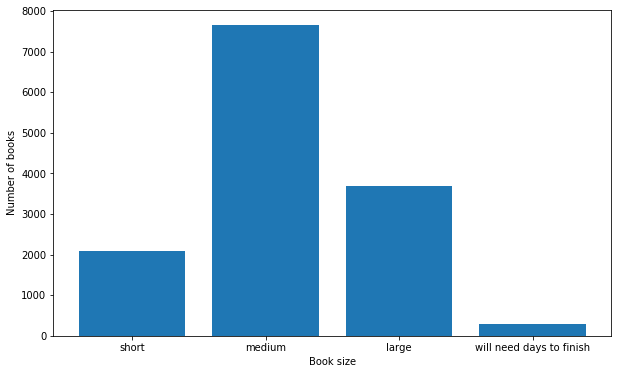

In [13]:
plt.figure(figsize=(10,6))
plt.bar(myList, Values)
plt.xlabel('Book size')
plt.ylabel('Number of books')

In [14]:
# Book Classification based on the average rating
x = ['Don\'t waste your time','Fair','Good','Extraordinary']
y = []
y.append(df[df['average_rating'] <= 2]['title'].count())
y.append(df[(df['average_rating'] > 2) & (df['average_rating'] <= 3.5)]['title'].count())
y.append(df[(df['average_rating'] > 3.5) & (df['average_rating'] <= 4.5)]['title'].count())
y.append(df[df['average_rating'] > 4.5]['title'].count())

Text(0, 0.5, 'Number of books')

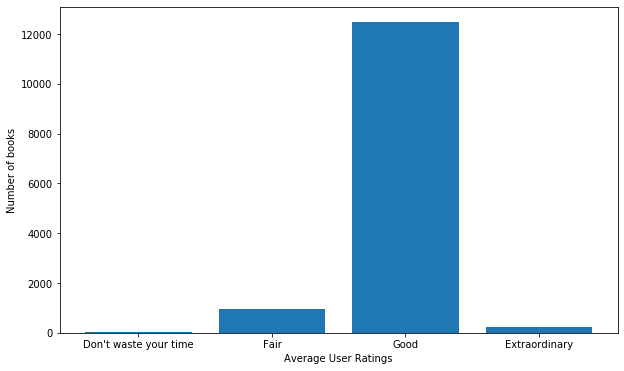

In [15]:
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.xlabel('Average User Ratings')
plt.ylabel('Number of books')

In [16]:
# Top 10 books which are extraordinary and highest rating counts
topBest = dataCopy[dataCopy['average_rating'] > 4.5].sort_values(by = 'ratings_count', ascending = False).head(10)
topBest = topBest.sort_values(by = 'average_rating', ascending = False)

Text(0.5, 1.0, 'Top 10 extraordinary books\n (maximum reviews and avg_rating > 4.5)\n')

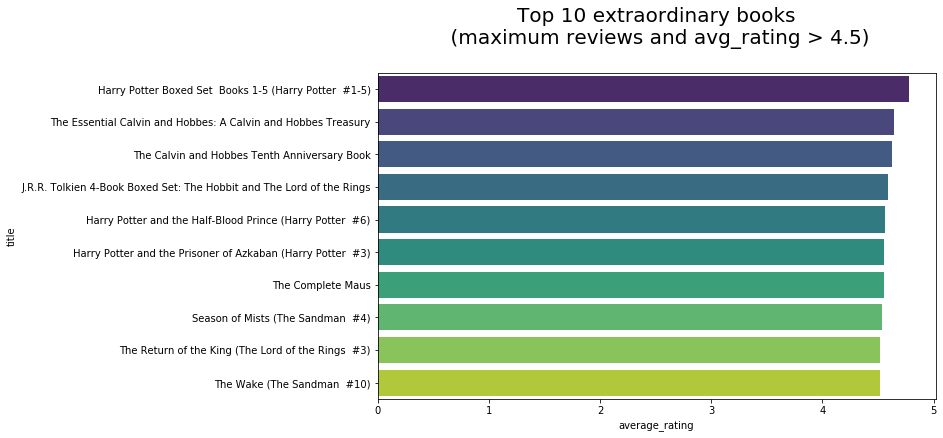

In [17]:
plt.figure(figsize=(10,6))
sn.barplot(x = 'average_rating', y = 'title', data = topBest, palette = 'viridis')
plt.title('Top 10 extraordinary books\n (maximum reviews and avg_rating > 4.5)\n', fontsize=20)

Text(0.5, 0, 'number of books')

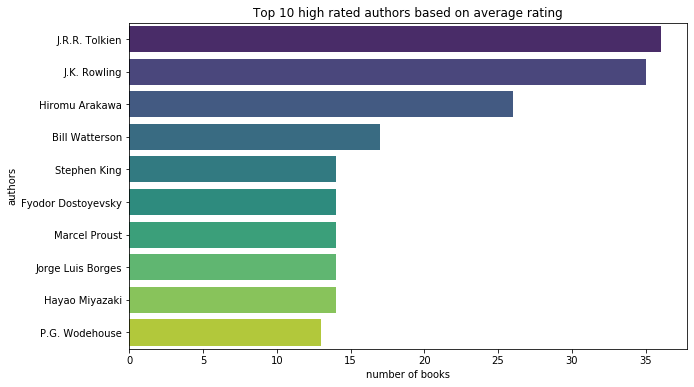

In [18]:
# Top 10 authors based on average rating
df['authors'] = df['authors'].apply(lambda authors: authors.split('-')[0])
topAuth = df[df['average_rating'] > 4.3]
topAuth = topAuth.groupby('authors')['title'].count().reset_index()
topAuth = topAuth.sort_values('title', ascending = False).head(10)
plt.figure(figsize=(10,6))
sn.barplot(x = 'title', y = 'authors', data = topAuth, palette = 'viridis')
plt.title('Top 10 high rated authors based on average rating')
plt.xlabel('number of books')